In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

## Simulation of R-model to produce Figure 3

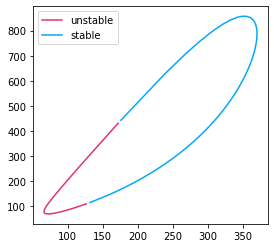

In [9]:
# passengers
p = 7.
χ = 2.5
β = .3
γ = 50.
θ = 1./4.
ψ = 10.0e3
f = lambda w,p: ψ*np.exp(-β*p-χ*w)
# f = lambda w,p: ψ - β*p - χ*w

ε = np.finfo(float).eps
D = np.vectorize(lambda n,p: opt.fsolve(lambda Q: f(γ/max(n-θ*Q,ε),p)-Q,x0=n/θ/3)[0])

# drivers
a = 3.
b = 5.
j = 4.
Ω = 600
R_min = 3
R = lambda n: R_min + b/((Ω/n)**(1/j)-1)**(1/a)
S = np.vectorize(lambda n,p: n*R(n)/p)

ns = np.linspace(10,400,100)
p0 = p-3.019
p1 = p+3.83
ps = np.linspace(p0,p1,50)
fig,ax = plt.subplots(figsize=(4.2,4))
def asdf (p,x0):
    try:
        return opt.fsolve(lambda n: D(n,p)-S(n,p),x0=x0)
    except RuntimeWarning:
        return 0
    
asdf = np.vectorize(asdf)
ns = asdf(ps,50)
ax.plot(ns, D(ns,ps),c="#e33371",label="unstable")
ns = asdf(ps,400)
ax.plot(ns,D(ns,ps),c="#03a9f4",label="stable")
ax.legend()

## Simulation of $C$-model where optimal medallion rent is positive

In [2]:
R = 2.0
θ = 1./3.
β = 5.
Q0 = 30.
γ = .5
cmax = 1
Ω = 10.
χ = 5.
f = lambda w,p,c: Q0 - β*w - (p+c)*χ
cbar = lambda n: cmax*(n/(2*Ω))
chat = lambda n: cmax*(n/Ω)
ε = np.finfo(float).eps
D = lambda n,p: opt.fsolve(lambda Q: f(γ/max(n-θ*Q,ε),p,cbar(n))-Q,x0=n/θ/2)[0]

def W(n,p):
    Q = D(n,p)
    return Q**2/(2*χ) + (p-cbar(n))*Q - R*n
bnds = ([ε, Ω], [0, None])
n,p = opt.minimize(lambda x: -W(*x), 
                   (Ω/2, R*θ),
                   constraints={
                   'type': 'ineq', 
                   'fun': lambda x:  x[0]-D(x[0],x[1])*θ
                   },
                   bounds=bnds).x
Q = D(n,p)
m = Q*(p-chat(n))/n - R
print(f"n= {n},\np= {p},\nQ= {Q},\nm= {m},\ncbar= {cbar(n)},\nchat= {chat(n)},\nw= {γ/(n-θ*Q)}")

n= 7.61239910546075,
p= 1.654168380488681,
Q= 18.20644950193997,
m= 0.13560230771302972,
cbar= 0.3806199552730375,
chat= 0.761239910546075,
w= 0.32392176385028587


## Simulation where optimal price is below marginal cost

In [3]:
#when passengers don't care about quality
R = .2
θ = 1./3.
β = 5.
Q0 = 30.
γ = .5
cmax = 1
Ω = 15.
χ = 5.
f = lambda w,p,c: Q0 - β*w - (p)*χ
cbar = lambda n: cmax*(n/(2*Ω))
chat = lambda n: cmax*(n/Ω)
ε = np.finfo(float).eps
D = lambda n,p: opt.fsolve(lambda Q: f(γ/max(n-θ*Q,ε),p,cbar(n))-Q,x0=n/θ/2)[0]

def W(n,p):
    Q = D(n,p)
    return Q**2/(2*χ) + (p-cbar(n))*Q - R*n
bnds = ([ε, Ω], [0, None])
n,p = opt.minimize(lambda x: -W(*x), 
                   (Ω/2, R*θ),
                   constraints={
                   'type': 'ineq', 
                   'fun': lambda x:  x[0]-D(x[0],x[1])*θ
                   },
                   bounds=bnds).x
Q = D(n,p)
m = Q*(p-chat(n))/n - R
print(f"n= {n},\np= {p},\nQ= {Q},\nm= {m},\ncbar= {cbar(n)},\nchat= {chat(n)},\nw= {γ/(n-θ*Q)}")

n= 11.995449583735082,
p= 0.7502031328742483,
Q= 25.53160653295938,
m= -0.30534400677234236,
cbar= 0.39984831945783605,
chat= 0.7996966389156721,
w= 0.14347556053387558


In [7]:
Q/n*(chat(n)-p + R * n / Q + p - chat(n)) - R 

8.326672684688674e-17